In [120]:
import pandas as pd

File = pd.read_csv("Nexus.xls")
Nexus = pd.DataFrame(File)
Nexus.columns

Index(['Timestamp', 'Form ID', 'Respondent's Name', 'Municipality/VDC', 'Ward',
       'Sex', 'Age', 'Number of Family members', 'Educational Qualification',
       'Primary Occupation', 'Caste',
       '1. What sources of water does your household depend upon to fulfill irrigation needs?',
       '2. Do you utilize most of your water endowment in fulfilling irrigation needs?',
       ' 3. Is your household dependent on fossil fuel (diesel pump) or electrical energy for drawing water for fulfilling irrigation needs? ',
       '4. If yes, please tick the sources of water that require energy to be conducted?',
       '5.  Do your sources provide sufficient water to specifically fulfill your irrigation needs? ',
       '6.  If no, what factors are responsible for causing water stress for fulfilling irrigation needs.',
       '7. Have you observed drop in agriculture productivity during years of insufficient water availability?',
       '8. If yes, How has insufficiency of water availabili

In [121]:
colls = Nexus.columns.to_list()
colls = [columns.strip() for columns in colls] #removing whitespaces in the columns
Nexus.columns = colls
Nexus.columns

Index(['Timestamp', 'Form ID', 'Respondent's Name', 'Municipality/VDC', 'Ward',
       'Sex', 'Age', 'Number of Family members', 'Educational Qualification',
       'Primary Occupation', 'Caste',
       '1. What sources of water does your household depend upon to fulfill irrigation needs?',
       '2. Do you utilize most of your water endowment in fulfilling irrigation needs?',
       '3. Is your household dependent on fossil fuel (diesel pump) or electrical energy for drawing water for fulfilling irrigation needs?',
       '4. If yes, please tick the sources of water that require energy to be conducted?',
       '5.  Do your sources provide sufficient water to specifically fulfill your irrigation needs?',
       '6.  If no, what factors are responsible for causing water stress for fulfilling irrigation needs.',
       '7. Have you observed drop in agriculture productivity during years of insufficient water availability?',
       '8. If yes, How has insufficiency of water availability 

In [122]:
for i, columns in enumerate(colls):
    print(i, columns)

0 Timestamp
1 Form ID
2 Respondent's Name
3 Municipality/VDC
4 Ward
5 Sex
6 Age
7 Number of Family members
8 Educational Qualification
9 Primary Occupation
10 Caste
11 1. What sources of water does your household depend upon to fulfill irrigation needs?
12 2. Do you utilize most of your water endowment in fulfilling irrigation needs?
13 3. Is your household dependent on fossil fuel (diesel pump) or electrical energy for drawing water for fulfilling irrigation needs?
14 4. If yes, please tick the sources of water that require energy to be conducted?
15 5.  Do your sources provide sufficient water to specifically fulfill your irrigation needs?
16 6.  If no, what factors are responsible for causing water stress for fulfilling irrigation needs.
17 7. Have you observed drop in agriculture productivity during years of insufficient water availability?
18 8. If yes, How has insufficiency of water availability affected agricultural productivity?
19 9. What adaptation measures have you adapted t

In [123]:
Contexts = Nexus.iloc[:, 20:27] 
Contexts.head()

,10. Do you rely on forest and rangeland products (such as litter or traditional biomass) to supply input fertilizers for your farming plot?,11. Does such collected litter or traditional biomass fulfill your need of fertilizer ?,12. Does litter and traditional biomass as agricultural inputs ensure optimum agricultural productivity of your farming plot?,13. Do you manage to collect sufficient amount of litter and traditional biomass that you require?,"14. If no, what factors have denied you from gathering sufficient amount of litter and traditional biomass?",15. Have you adopted adaptive measures to fulfill your agricultural input needs amid unavailability of sufficient forest-based litter and traditional biomass?,16. Is your farm plots close to the local forest or rangeland?
0,Yes,No,Yes,Yes,NaN,Relied on chemical fertilizers as supplementary,Yes
1,No,NaN,No,Yes,NaN,Relied on chemical fertilizers as supplementary,Yes
2,Yes,Yes,Yes,No,Due to restrictions by community institutions;...,Relied on chemical fertilizers as supplementary,Yes
3,No,No,No,Yes,NaN,Relied on chemical fertilizers as supplementary,Yes
4,No,Yes,Yes,No,Due to restrictions by community institutions,Relied on chemical fertilizers as supplementar...,Yes


In [124]:
Contexts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 7 columns):
 #   Column                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                           --------------  ----- 
 0   10.   Do you rely on forest and rangeland products (such as litter or traditional biomass) to supply input fertilizers for your farming plot?                    118 non-null    object
 1   11.    Does such collected litter or traditional biomass fulfill your need of fertilizer ?                                                                       109 non-null    object
 2   12. Does litter and traditional biomass as agricultural inputs ensure optimum agricultural productivity of your farming plot?          

In [125]:
Contexts.drop(columns = "14. If no, what factors have denied you from gathering sufficient amount of litter and traditional biomass?",
              axis = 1,
              inplace = True)

In [126]:
Contexts = Contexts.rename(columns = {"10.   Do you rely on forest and rangeland products (such as litter or traditional biomass) to supply input fertilizers for your farming plot?": "Reliance on forests for fertilizer", 
                 "11.    Does such collected litter or traditional biomass fulfill your need of fertilizer ?": "State of forest biomass fulfillment",
                 "12. Does litter and traditional biomass as agricultural inputs ensure optimum agricultural productivity of your farming plot?": "Productivity of forest-biomass based fertilizers",
                 "13.  Do you manage to collect sufficient amount of litter and traditional biomass that you require?": "State of forest biomass sufficiency",
                 "15.  Have you adopted adaptive measures to fulfill your agricultural input needs amid unavailability of sufficient forest-based litter and traditional biomass?": "Adaptation against use of forest biomass for fertilizer",
                 "16.  Is your farm plots close to the local forest or rangeland?": "Proximity of farm to forest"})
Contexts.head()

,Reliance on forests for fertilizer,State of forest biomass fulfillment,Productivity of forest-biomass based fertilizers,State of forest biomass sufficiency,Adaptation against use of forest biomass for fertilizer,Proximity of farm to forest
0,Yes,No,Yes,Yes,Relied on chemical fertilizers as supplementary,Yes
1,No,NaN,No,Yes,Relied on chemical fertilizers as supplementary,Yes
2,Yes,Yes,Yes,No,Relied on chemical fertilizers as supplementary,Yes
3,No,No,No,Yes,Relied on chemical fertilizers as supplementary,Yes
4,No,Yes,Yes,No,Relied on chemical fertilizers as supplementar...,Yes


### Data Preparation 

In [127]:
Contexts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 6 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Reliance on forests for fertilizer                       118 non-null    object
 1   State of forest biomass fulfillment                      109 non-null    object
 2   Productivity of forest-biomass based fertilizers         112 non-null    object
 3   State of forest biomass sufficiency                      108 non-null    object
 4   Adaptation against use of forest biomass for fertilizer  63 non-null     object
 5   Proximity of farm to forest                              118 non-null    object
dtypes: object(6)
memory usage: 5.7+ KB


In [128]:
Contexts["Reliance on forests for fertilizer"].value_counts()
#This one is tight on values

Reliance on forests for fertilizer
Yes    108
No      10
Name: count, dtype: int64

In [129]:
Contexts["State of forest biomass fulfillment"].value_counts() #This means whether biomass characteristically fulfills the needs of preparing biomass
#Almost tight enough, will use mode imputer to tighten it up

State of forest biomass fulfillment
Yes    91
No     18
Name: count, dtype: int64

In [130]:
Contexts["Productivity of forest-biomass based fertilizers"].value_counts()
#Almost tight enough, will use mode imputer to tighten it up

Productivity of forest-biomass based fertilizers
Yes             73
No              38
I don't know     1
Name: count, dtype: int64

In [131]:
Contexts["State of forest biomass sufficiency"].value_counts()
#Almost tight enough, will use mode imputer to tighten it up``

State of forest biomass sufficiency
Yes    83
No     25
Name: count, dtype: int64

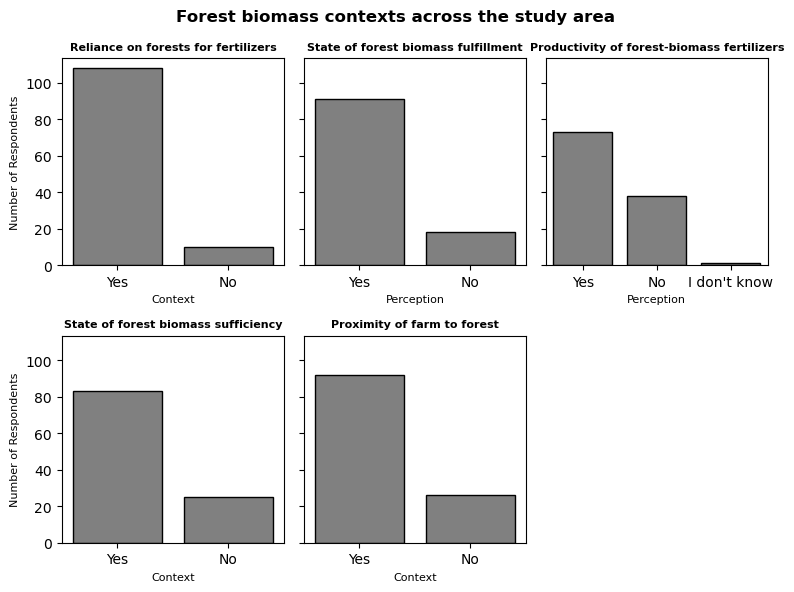

In [132]:
#Rendering multigrid visualization of forest biomass status data
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 3, sharey = True, figsize = (8,6))
sns.countplot(x = Contexts["Reliance on forests for fertilizer"],
              color = "grey",
              edgecolor = "black",
              ax = ax[0,0])
ax[0,0].set_title("Reliance on forests for fertilizers",
                  fontsize = 8,
                  fontweight = "bold")
ax[0,0].set_xlabel("Context",
                   fontsize = 8)
ax[0,0].set_ylabel("Number of Respondents",
                   fontsize = 8)

desired_order = ["Yes", "No"] #since no was coming before yes in the default order
sns.countplot(x = Contexts["State of forest biomass fulfillment"],
              color = "grey",
              edgecolor = "black",
              order = desired_order,
              ax = ax[0,1])
ax[0,1].set_title("State of forest biomass fulfillment",
                  fontsize = 8,
                  fontweight = "bold")
ax[0,1].set_xlabel("Perception",
                   fontsize = 8)
ax[0,1].set_ylabel("Number of Respondents",
                   fontsize = 8)

sns.countplot(x = Contexts["Productivity of forest-biomass based fertilizers"],
              color = "grey",
              edgecolor = "black",
              ax = ax[0,2])
ax[0,2].set_title("Productivity of forest-biomass fertilizers",
                  fontsize = 8,
                  fontweight = "bold")
ax[0,2].set_xlabel("Perception",
                   fontsize = 8)
ax[0,2].set_ylabel("Number of Respondents",
                   fontsize = 8)

sns.countplot(x = Contexts["State of forest biomass sufficiency"],
              color = "grey",
              edgecolor = "black",
              ax = ax[1,0])
ax[1,0].set_title("State of forest biomass sufficiency",
                  fontsize = 8,
                  fontweight = "bold")
ax[1,0].set_xlabel("Context",
                   fontsize = 8)
ax[1,0].set_ylabel("Number of Respondents",
                   fontsize = 8)

sns.countplot(x = Contexts["Proximity of farm to forest"],
              color = "grey",
              edgecolor = "black",
              ax = ax[1,1])
ax[1,1].set_title("Proximity of farm to forest",
                  fontsize = 8,
                  fontweight = "bold")
ax[1,1].set_xlabel("Context",
                   fontsize = 8)
ax[1,1].set_ylabel("Number of Respondents",
                   fontsize = 8)

ax[1,2].axis("off")

fig.suptitle("Forest biomass contexts across the study area",
             fontsize = 12,
             fontweight = "bold")
fig.tight_layout()
plt.savefig("Forest biomass contexts.jpeg")
plt.show()

## <font color = "red"> Extra details - Begin </font>

In [133]:
Contexts["Adaptation against use of forest biomass for fertilizer"].value_counts()
#will have to streamline the options for these ones

Adaptation against use of forest biomass for fertilizer
Relied on chemical fertilizers as supplementary                                                                                42
No measures applied                                                                                                             9
Relied on chemical fertilizers as supplementary; Application of lesser amount of traditional biomass and litter per hectare     2
Using livestock compost                                                                                                         2
Relied on chemical fertilizers as supplementary, Buy from market to fulfill farmland necessity                                  1
Using livestock compost and agriculture byproduct                                                                               1
Using livestock composting; Using Nimuro-asuro for manuaring purpose                                                            1
Using livestock composting and Jho

In [134]:
Contexts["Adaptation against use of forest biomass for fertilizer"].replace("Relied on chemical fertilizers as supplementary; Application of lesser amount of traditional biomass and litter per hectare",
                                                                            "Relied on chemical fertilizers as supplementary", inplace = True)
Contexts["Adaptation against use of forest biomass for fertilizer"].replace("Relied on chemical fertilizers as supplementary, Buy from market to fulfill farmland necessity",
                                                                            "Relied on chemical fertilizers as supplementary", inplace = True)
Contexts["Adaptation against use of forest biomass for fertilizer"].replace("Relied on chemical fertilizers as supplementary, Livestockl compost",
                                                                            "Relied on chemical fertilizers as supplementary", inplace=True)
Contexts["Adaptation against use of forest biomass for fertilizer"].replace("Using livestock compost",
                                                                            "Using livestock compost only", inplace=True)
Contexts["Adaptation against use of forest biomass for fertilizer"].replace("Using livestock composting; Using Nimuro-asuro for manuaring purpose",
                                                                            "Using livestock compost only", inplace=True)
Contexts["Adaptation against use of forest biomass for fertilizer"].value_counts()

C:\Users\prien\AppData\Local\Temp\ipykernel_5580\2496698427.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Contexts["Adaptation against use of forest biomass for fertilizer"].replace("Relied on chemical fertilizers as supplementary; Application of lesser amount of traditional biomass and litter per hectare",
C:\Users\prien\AppData\Local\Temp\ipykernel_5580\2496698427.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will cha

Adaptation against use of forest biomass for fertilizer
Relied on chemical fertilizers as supplementary                               46
No measures applied                                                            9
Using livestock compost only                                                   3
Using livestock compost and agriculture byproduct                              1
Using livestock composting and Jholmol                                         1
Relying on chemical fertilizers completely, Buying livestock compost           1
Relying on chemical fertilizers completely; Buying livestock compost           1
Application of lesser amount of traditional biomass and litter per hectare     1
Name: count, dtype: int64

In [135]:
import numpy as np
Contexts["Adaptation against use of forest biomass for fertilizer"].replace("Relying on chemical fertilizers completely, Buying livestock compost ",
                                                                            "Complete reliance on chemical fertilizers",
                                                                            inplace = True)
Contexts["Adaptation against use of forest biomass for fertilizer"].replace("Relying on chemical fertilizers completely; Buying livestock compost ",
                                                                            "Complete reliance on chemical fertilizers",
                                                                            inplace = True)

Contexts["Adaptation against use of forest biomass for fertilizer"].replace("Using livestock composting and Jholmol', nan",
                                                                            "Using livestock compost and Jholmol",
                                                                            inplace = True)

Contexts["Adaptation against use of forest biomass for fertilizer"].replace("Application of lesser amount of traditional biomass and litter per hectare",
                                                                            np.nan,
                                                                            inplace = True)
Contexts["Adaptation against use of forest biomass for fertilizer"].value_counts()

C:\Users\prien\AppData\Local\Temp\ipykernel_5580\2080828738.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Contexts["Adaptation against use of forest biomass for fertilizer"].replace("Relying on chemical fertilizers completely, Buying livestock compost ",
C:\Users\prien\AppData\Local\Temp\ipykernel_5580\2080828738.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work

Adaptation against use of forest biomass for fertilizer
Relied on chemical fertilizers as supplementary      46
No measures applied                                   9
Using livestock compost only                          3
Complete reliance on chemical fertilizers             2
Using livestock compost and agriculture byproduct     1
Using livestock composting and Jholmol                1
Name: count, dtype: int64

In [136]:
Contexts["Adaptation against use of forest biomass for fertilizer"].unique()

array(['Relied on chemical fertilizers as supplementary',
       'No measures applied', 'Using livestock compost only',
       'Using livestock compost and agriculture byproduct',
       'Using livestock composting and Jholmol', nan,
       'Complete reliance on chemical fertilizers'], dtype=object)

In [137]:
Contexts.head()

,Reliance on forests for fertilizer,State of forest biomass fulfillment,Productivity of forest-biomass based fertilizers,State of forest biomass sufficiency,Adaptation against use of forest biomass for fertilizer,Proximity of farm to forest
0,Yes,No,Yes,Yes,Relied on chemical fertilizers as supplementary,Yes
1,No,NaN,No,Yes,Relied on chemical fertilizers as supplementary,Yes
2,Yes,Yes,Yes,No,Relied on chemical fertilizers as supplementary,Yes
3,No,No,No,Yes,Relied on chemical fertilizers as supplementary,Yes
4,No,Yes,Yes,No,Relied on chemical fertilizers as supplementary,Yes


## <font color = "red"> Extra Details - End </font>

In [138]:
#But, i think we should get rid of the Adaptation measure columns, but lets not replace the dataframe for now
Forest_biomass = Contexts.drop(columns="Adaptation against use of forest biomass for fertilizer")
Forest_biomass.head()

,Reliance on forests for fertilizer,State of forest biomass fulfillment,Productivity of forest-biomass based fertilizers,State of forest biomass sufficiency,Proximity of farm to forest
0,Yes,No,Yes,Yes,Yes
1,No,NaN,No,Yes,Yes
2,Yes,Yes,Yes,No,Yes
3,No,No,No,Yes,Yes
4,No,Yes,Yes,No,Yes


In [139]:
Forest_biomass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Reliance on forests for fertilizer                118 non-null    object
 1   State of forest biomass fulfillment               109 non-null    object
 2   Productivity of forest-biomass based fertilizers  112 non-null    object
 3   State of forest biomass sufficiency               108 non-null    object
 4   Proximity of farm to forest                       118 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


In [140]:
#Let's work on the target variable
Target = Nexus.iloc[:, 75:79]
Target.drop(columns = "33.  What kind of below-mentioned practice is relevant to your farm plot?  [Others]",
            axis = 1,
            inplace = True)
Target.head()

,33. What kind of below-mentioned practice is relevant to your farm plot? [Chemical fertilizer Only],33. What kind of below-mentioned practice is relevant to your farm plot? [Traditional biomass manure only],33. What kind of below-mentioned practice is relevant to your farm plot? [Mix of chemical and biomass-based fertilizer]
0,NaN,NaN,Planting of imported species of crops only
1,NaN,NaN,Planting of imported species of crops only
2,NaN,NaN,Planting of mix of imported and indigenous spe...
3,NaN,NaN,Planting of imported species of crops only
4,NaN,NaN,Planting of imported species of crops only


In [141]:
Target.rename(columns = {"33.  What kind of below-mentioned practice is relevant to your farm plot?  [Chemical fertilizer Only]": 
                         "Chemical Fertilizers only"}, inplace = True)
Target.rename(columns = {"33.  What kind of below-mentioned practice is relevant to your farm plot?  [Traditional biomass manure only]":
                         "Traditional biomass only"}, inplace = True)
Target.rename(columns = {"33.  What kind of below-mentioned practice is relevant to your farm plot?  [Mix of chemical and biomass-based fertilizer]":
                         "Mix of chemical fertilizers and traditional biomass"}, inplace = True)
Target.columns

Index(['Chemical Fertilizers only', 'Traditional biomass only',
       'Mix of chemical fertilizers and traditional biomass'],
      dtype='object')

In [142]:
Target["Chemical Fertilizers only"].replace("Planting of indigenous species of crops only", "Chemical Fertilizers only", inplace = True)
Target["Traditional biomass only"].replace("Planting of mix of imported and indigenous species of crops", "Traditional biomass only", inplace = True)
Target["Traditional biomass only"].replace("Planting of indigenous species of crops only", "Traditional biomass only", inplace = True)
Target["Traditional biomass only"].replace("Planting of imported species of crops only", "Traditional biomass only", inplace = True)
Target["Traditional biomass only"].value_counts()

C:\Users\prien\AppData\Local\Temp\ipykernel_5580\1599386835.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Target["Chemical Fertilizers only"].replace("Planting of indigenous species of crops only", "Chemical Fertilizers only", inplace = True)
C:\Users\prien\AppData\Local\Temp\ipykernel_5580\1599386835.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the

Traditional biomass only
Traditional biomass only    45
Name: count, dtype: int64

In [143]:
Target["Mix of chemical fertilizers and traditional biomass"].replace("Planting of imported species of crops only", "Mix of chemical fertilizers and traditional biomass", inplace = True)
Target["Mix of chemical fertilizers and traditional biomass"].replace("Planting of mix of imported and indigenous species of crops", "Mix of chemical fertilizers and traditional biomass", inplace = True)
Target["Mix of chemical fertilizers and traditional biomass"].replace("Planting of indigenous species of crops only", "Mix of chemical fertilizers and traditional biomass", inplace = True)
Target["Mix of chemical fertilizers and traditional biomass"].value_counts()


C:\Users\prien\AppData\Local\Temp\ipykernel_5580\3300547023.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Target["Mix of chemical fertilizers and traditional biomass"].replace("Planting of imported species of crops only", "Mix of chemical fertilizers and traditional biomass", inplace = True)
C:\Users\prien\AppData\Local\Temp\ipykernel_5580\3300547023.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.

Mix of chemical fertilizers and traditional biomass
Mix of chemical fertilizers and traditional biomass    69
Name: count, dtype: int64

In [144]:
Target["Chemical Fertilizers only"].value_counts()

Chemical Fertilizers only
Chemical Fertilizers only    3
Name: count, dtype: int64

In [145]:
#Now combining the data in Target dataframes into a single row
Target["Manure Choice"] = Target["Mix of chemical fertilizers and traditional biomass"].fillna(Target["Chemical Fertilizers only"]).fillna(Target["Traditional biomass only"])
Target.drop(columns = ["Chemical Fertilizers only", "Traditional biomass only", "Mix of chemical fertilizers and traditional biomass"],
            axis = 1,
            inplace = True)
Target.info()
Target.to_csv("Target Manure.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Manure Choice  117 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


In [146]:
#Now combining our independent variables concerning manure perception and choice of manure adoption
Manure_choice = pd.concat([Forest_biomass, Target], axis = 1)
Manure_choice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 6 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Reliance on forests for fertilizer                118 non-null    object
 1   State of forest biomass fulfillment               109 non-null    object
 2   Productivity of forest-biomass based fertilizers  112 non-null    object
 3   State of forest biomass sufficiency               108 non-null    object
 4   Proximity of farm to forest                       118 non-null    object
 5   Manure Choice                                     117 non-null    object
dtypes: object(6)
memory usage: 5.7+ KB


### Data preprocessing for analysis

In [147]:
#We have decided to drop all rows (i.e., 1 out of 118) without a record in the target column, while rest shall be fitted with their respective mode
Manure_choice.dropna(subset=["Manure Choice"],
                     inplace = True)
Manure_choice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 0 to 117
Data columns (total 6 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Reliance on forests for fertilizer                117 non-null    object
 1   State of forest biomass fulfillment               108 non-null    object
 2   Productivity of forest-biomass based fertilizers  111 non-null    object
 3   State of forest biomass sufficiency               107 non-null    object
 4   Proximity of farm to forest                       117 non-null    object
 5   Manure Choice                                     117 non-null    object
dtypes: object(6)
memory usage: 6.4+ KB


In [148]:
#Now splitting the data into train, evaluate, and test batch for further processing. This has to be done beforehand to avoid data snooping/leakage across
#the batches
x_data = Manure_choice.iloc[:, 0:5]
y_data = Manure_choice["Manure Choice"]

from sklearn.model_selection import train_test_split
x_train_eval, x_test, y_train_eval, y_test = train_test_split(x_data, y_data, test_size = 0.30, random_state = 1, stratify = y_data)
x_train, x_eval, y_train, y_eval = train_test_split(x_train_eval, y_train_eval, test_size = 0.30, random_state = 1)
print(x_train.shape[0], x_eval.shape[0], x_test.shape[0], y_train.shape[0], y_eval.shape[0], y_test.shape[0])

56 25 36 56 25 36


##### Encoding the independent variables (OneHotEncoding)

In [149]:
#creating the list of column name memory for reapplication on imputed batches
columns = x_train.columns.to_list() 

In [150]:
#Now working on imputing the mode value in the null spaces of the independent variables
from sklearn.impute import SimpleImputer
Mode_imputer = SimpleImputer(strategy= "most_frequent") 
Mode_imputer.fit(x_train)
x_train = Mode_imputer.transform(x_train)
x_train_df = pd.DataFrame(x_train)
x_train_df.columns = columns

x_eval = Mode_imputer.transform(x_eval)
x_eval_df = pd.DataFrame(x_eval)
x_eval_df.columns = columns

x_test = Mode_imputer.transform(x_test)
x_test_df = pd.DataFrame(x_test)
x_test_df.columns = columns

In [151]:
x_train_df.head()

,Reliance on forests for fertilizer,State of forest biomass fulfillment,Productivity of forest-biomass based fertilizers,State of forest biomass sufficiency,Proximity of farm to forest
0,Yes,Yes,No,Yes,Yes
1,Yes,Yes,Yes,Yes,No
2,Yes,Yes,Yes,Yes,Yes
3,Yes,Yes,Yes,Yes,Yes
4,Yes,No,No,Yes,Yes


In [152]:
#Now encoding our independent variables with onehotencoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output= False,
                        drop = "first",
                        handle_unknown= "ignore") 
encoder.fit(x_train_df)
encoded_x_train = encoder.transform(x_train_df)
encoded_x_train_df = pd.DataFrame(encoded_x_train, columns = encoder.get_feature_names_out(x_train_df.columns.to_list()))

encoded_x_eval = encoder.transform(x_eval_df)
encoded_x_eval_df= pd.DataFrame(encoded_x_eval, columns = encoder.get_feature_names_out(x_train_df.columns.to_list()))

encoded_x_test = encoder.transform(x_test_df)
encoded_x_test_df = pd.DataFrame(encoded_x_test, columns =  encoder.get_feature_names_out(x_train_df.columns.to_list()))
encoded_x_test_df.head(10)

d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,Reliance on forests for fertilizer_Yes,State of forest biomass fulfillment_Yes,Productivity of forest-biomass based fertilizers_Yes,State of forest biomass sufficiency_Yes,Proximity of farm to forest_Yes
0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0
2,0.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0
4,0.0,1.0,1.0,0.0,1.0
5,1.0,1.0,1.0,1.0,0.0
6,1.0,0.0,1.0,1.0,1.0
7,1.0,1.0,1.0,0.0,1.0
8,1.0,1.0,0.0,1.0,1.0
9,1.0,0.0,1.0,0.0,1.0


##### Encoding the dependent variables (LabelEncoding)

In [153]:
y_train.value_counts()

Manure Choice
Mix of chemical fertilizers and traditional biomass    34
Traditional biomass only                               21
Chemical Fertilizers only                               1
Name: count, dtype: int64

In [154]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

encoded_y_train = label_encoder.transform(y_train)
encoded_y_train_df = pd.DataFrame(encoded_y_train)
encoded_y_train_df.columns = ["Manure choice"]

encoded_y_eval = label_encoder.transform(y_eval)
encoded_y_eval_df = pd.DataFrame(encoded_y_eval)
encoded_y_eval_df.columns = ["Manure choice"]

encoded_y_test = label_encoder.transform(y_test)
encoded_y_test_df = pd.DataFrame(encoded_y_test)
encoded_y_test_df.columns = ["Manure choice"]

for i, labels in enumerate(label_encoder.classes_):
    print(i, labels)

0 Chemical Fertilizers only
1 Mix of chemical fertilizers and traditional biomass
2 Traditional biomass only


In [155]:
print(encoded_y_train_df.value_counts())
print(encoded_y_eval_df.value_counts())
print(encoded_y_test_df.value_counts())
#Observe the rarity of the classification that is encoded as "0", which is "Use of chemical fertilizers only"

Manure choice
1                34
2                21
0                 1
Name: count, dtype: int64
Manure choice
1                14
2                10
0                 1
Name: count, dtype: int64
Manure choice
1                21
2                14
0                 1
Name: count, dtype: int64


#### Data Analysis (RandomForestClassifier)

In [156]:
#Now applying random forests for analyzing the signficance of independent variables in determining manure choice
#maxfeatures = int(encoded_x_train_df.shape[1]/3) (this is only able to generate one maxfeature for each tree, that is not optimal so we shall resort to
#other ways of generting max features)
import numpy as np
maxfeatures = int(np.sqrt(encoded_x_train_df.shape[1]))

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
Estimated = []
estimators = np.arange(10,160,10)
for estimates in estimators:
    rf = RandomForestClassifier(n_estimators=estimates,
                                max_features=maxfeatures,
                                max_depth=None,
                                random_state=0)
    rf.fit(encoded_x_train_df, encoded_y_train_df)
    encoded_y_eval_df_proba_hat = rf.predict_proba(encoded_x_eval_df)
    Eval_score = log_loss(encoded_y_eval_df, encoded_y_eval_df_proba_hat)
    Estimated.append(Eval_score)
print(f"{maxfeatures} features are allowed per random tree in our model")
print(Estimated)

d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

2 features are allowed per random tree in our model
[1.8775284285999683, 1.906721548447231, 1.91845082439276, 1.9191785318167203, 1.91607335725315, 1.9195726772621222, 1.9101027698894881, 1.9071952755334258, 1.904008028082873, 1.903240263709164, 1.898301579188778, 1.8979591898575547, 1.8991361592495855, 1.8979983363168944, 1.8976410050982813]


In [157]:
for i, values in enumerate(Estimated):
    print((i+1)*10, values)

10 1.8775284285999683
20 1.906721548447231
30 1.91845082439276
40 1.9191785318167203
50 1.91607335725315
60 1.9195726772621222
70 1.9101027698894881
80 1.9071952755334258
90 1.904008028082873
100 1.903240263709164
110 1.898301579188778
120 1.8979591898575547
130 1.8991361592495855
140 1.8979983363168944
150 1.8976410050982813


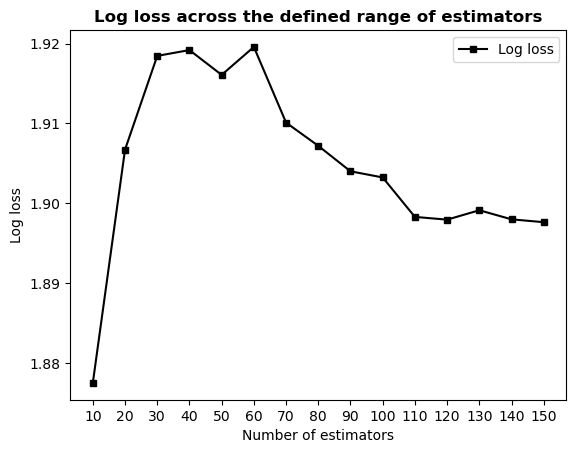

In [159]:
#Now graphing the scores across all estimators 
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(estimators,
        Estimated,
        marker = "s",
        markersize = 5,
        color = "black",
        label = "Log loss")
ax.set_title("Log loss across the defined range of estimators",
             fontweight = "bold")
ax.set_xlabel("Number of estimators")
ax.set_xticks(np.arange(10, 160, 10))
ax.set_ylabel("Log loss")
ax.legend()
plt.show()

In [160]:
#Now testing the predictiability of the classifier model in unseen test data with estimators that scored lowest log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

rf = RandomForestClassifier(n_estimators=10,
                            max_features=maxfeatures,
                            max_depth=None,
                            random_state = 0)
rf.fit(encoded_x_train_df, encoded_y_train_df)
encoded_y_test_df_proba_hat = rf.predict_proba(encoded_x_test_df)
score = log_loss(encoded_y_test_df, encoded_y_test_df_proba_hat)
print(score)

1.4618329189434183


d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


#### Observation
The Log loss of our model performed poorly in comparision to the baseline Log loss of 0.7810

Log loss > Baseline Log loss

LL baseline =−∑(M, j=1) Pj log(Pj)

LL baseline =−(P1 ln(P1) + P2 ln(P2) + P3 ln(P3))

LL baseline = − (0.02778 × ln(0.02778) + 0.58333 × ln(0.58333) + 0.38889 × ln(0.38889))

LL baseline = −((0.02778 × −3.5835) + (0.58333 × −0.5390) + (0.38889 × −0.9443))

LL baseline = −(−0.0995 + −0.3144 + −0.3671)

LL baseline = −(−0.7810)

LL baseline ≈0.7810

In [161]:
#Now observing the features that were most significant in determining the classifer model with notable accuracy
Feature_Importance = rf.feature_importances_
Feature_Importance = pd.DataFrame(Feature_Importance)
Feature_Importance = Feature_Importance.T
Feature_Importance.columns = encoded_x_train_df.columns.to_list()
Feature_Importance = Feature_Importance.T
Feature_Importance.reset_index(inplace = True)
Feature_Importance.columns = ["Features", "Significance"]
Feature_Importance.sort_values(by = "Significance",
                               ascending=True,
                               inplace = True) #for some reason, ascending works true when plotted with artist
                                                                                    #method
Feature_Importance

,Features,Significance
3,State of forest biomass sufficiency_Yes,0.109350
0,Reliance on forests for fertilizer_Yes,0.130569
1,State of forest biomass fulfillment_Yes,0.181663
4,Proximity of farm to forest_Yes,0.244487
2,Productivity of forest-biomass based fertilize...,0.333932


In [162]:
#Just to let know, the signficance value sum to one or one hundred percent
Feature_Importance["Significance"].sum()

np.float64(1.0)

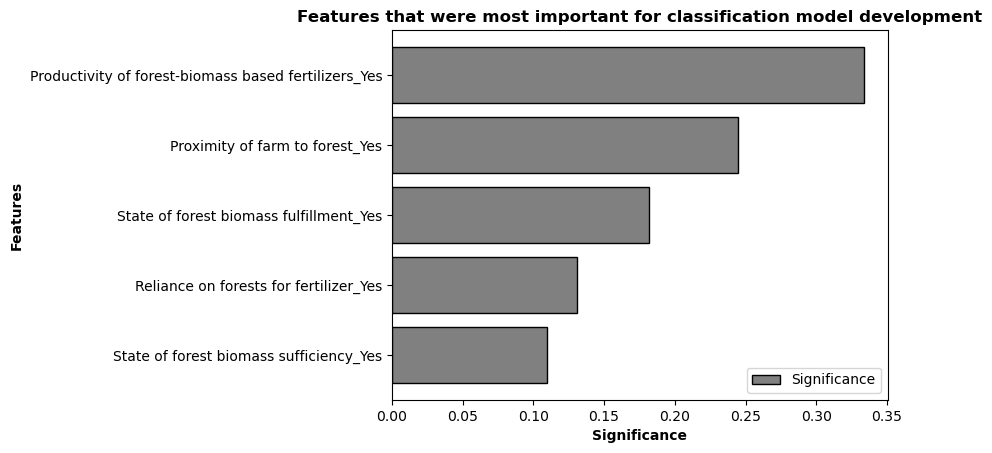

In [163]:
#Now graphing the important features of the classifier model in bar graph
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.barh(Feature_Importance["Features"],
        Feature_Importance["Significance"],
        color = "grey",
        edgecolor = "black",
        label = "Significance")
ax.set_title("Features that were most important for classification model development",
             fontweight = "bold")
ax.set_xlabel("Significance",
              fontweight = "bold")
ax.set_ylabel("Features",
              fontweight = "bold")
ax.legend()
plt.show()
#Reliance on forest for fertilizers may be less important counterintutively because, most of them rely on forest anyway (skewness). Also, the feature
#does not tell about the degree of reliance. Hence, its a common tradition to rely on forest to some degree. HGence, its more like a default state 
# than a decider.  

In [164]:
#Now pursuing the classification reports and confusion matrix
encoded_y_test_hat = rf.predict(encoded_x_test_df)
unencoded_y_test_hat = label_encoder.inverse_transform(encoded_y_test_hat)

from sklearn.metrics import classification_report
print(classification_report(y_test, unencoded_y_test_hat))

                                                     precision    recall  f1-score   support

                          Chemical Fertilizers only       0.00      0.00      0.00         1
Mix of chemical fertilizers and traditional biomass       0.84      0.76      0.80        21
                           Traditional biomass only       0.65      0.79      0.71        14

                                           accuracy                           0.75        36
                                          macro avg       0.50      0.52      0.50        36
                                       weighted avg       0.74      0.75      0.74        36



d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


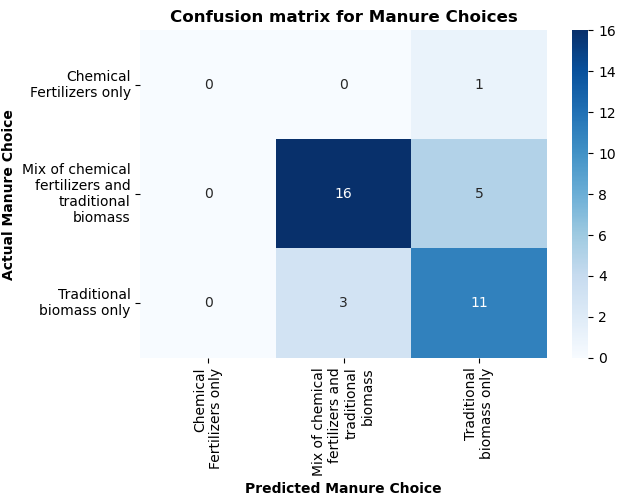

In [165]:
#Now observing the accuracy of the predictions through confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_test, unencoded_y_test_hat,)

fig, ax = plt.subplots()
sns.heatmap(conf_matrix,
            annot = True,
            cmap = "Blues",
            xticklabels = label_encoder.classes_,
            yticklabels = label_encoder.classes_,
            ax = ax)
ax.set_title("Confusion matrix for Manure Choices",
            fontsize = 12,
            fontweight = "bold")
ax.set_xlabel("Predicted Manure Choice",
            fontweight = "bold")
ax.set_ylabel("Actual Manure Choice",
            fontweight = "bold")

xticklabels = ax.get_xticklabels()
for label in xticklabels:
    label.set_wrap(True)
    label.set_ha("right")
    label.set_va("center")

yticklabels = ax.get_yticklabels()
for label in yticklabels:
    label.set_wrap(True)
    label.set_ha("right")
    label.set_va("center")

plt.tight_layout()
plt.show()